In [1]:
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.animation as animation
from matplotlib import rc
import matplotlib.path as mpath
import matplotlib
from IPython.display import HTML
font = {'size'   : 15}
rc('font', **font)

import xarray as xr
import cartopy.crs as ccrs
import cartopy

from scipy.io import loadmat

In [3]:
Nth = 100
Nph = Nth*2
dt = 0.5
time = np.arange(2002,2019.5+dt,dt) 


lon = np.linspace(-180,180,Nph)
lat = np.linspace(90,-90,Nth)

lon2, lat2 = np.meshgrid(lon,lat)

lon_min = 90
lon_max = -120

lat_min = 90
lat_max = 50

lon_min_idx = (np.abs(lon - lon_min)).argmin()
lon_max_idx = (np.abs(lon - lon_max)).argmin()

lat_min_idx = (np.abs(lat - lat_min)).argmin()
lat_max_idx = (np.abs(lat - lat_max)).argmin()

In [4]:
SA = loadmat('sa_total_chaos7.mat')
SA_all = SA['sa_total']


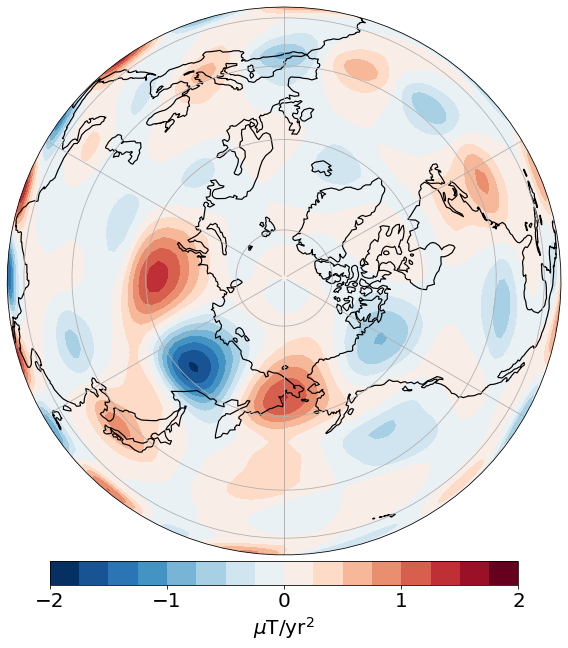

In [19]:
SA_all_xr = xr.DataArray(SA_all,coords={'time':time,'latitude':lat,'longitude':lon},dims=['time','latitude','longitude'])

matplotlib.rcParams.update({'font.size':20})

fig,ax = plt.subplots(1,1,figsize=(12,12),subplot_kw={"projection":ccrs.Orthographic(central_longitude=-180.0, central_latitude=90.0)})
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])
ax.set_boundary(map_circle, transform=ax.transAxes)

lvls=np.arange(-2,2.1,0.25)
(SA_all_xr[28]/1000).plot.contourf(ax=ax,levels=lvls,transform =ccrs.PlateCarree(),cbar_kwargs={'location':'bottom','shrink':0.7,'pad':0.01,'label':r'$\mu$T/yr$^2$','ticks':range(-2,3,1)})
ax.set_extent([-180, 179, 90, 1], ccrs.PlateCarree())
ax.coastlines(linewidth=1.2)
ax.gridlines()
ax.set_title("")
#plt.savefig('obs.png', format='png', dpi=600)
plt.savefig('obs.eps', format='eps',bbox_inches='tight')

Text(0.5, 0.1, 'Geomagnetic Acceleration, Time = 2016.0')

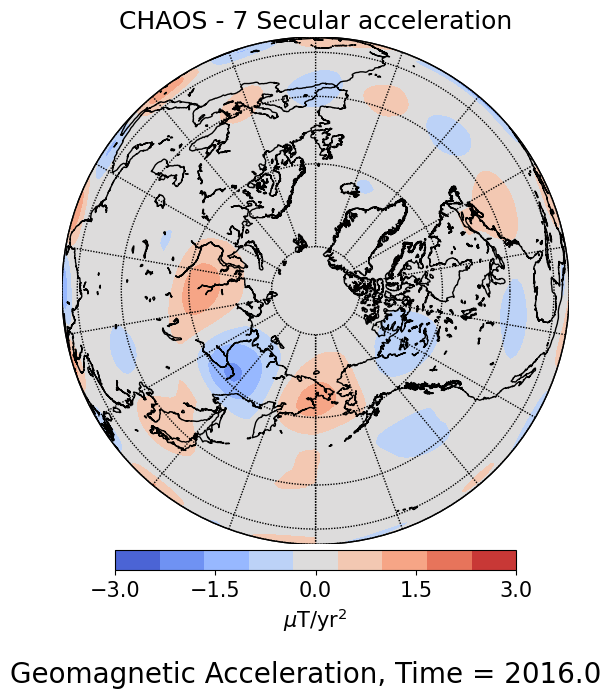

In [11]:
t = 28

lon_west=-270  
lon_east=-120
lat_north= 90
lat_south= 50

# Setup figure and subplots
f0,ax = plt.subplots(1,1, figsize = (8, 8))
#ax01 = plt.subplot2grid((1, 2), (0, 0), colspan=1) 


v_max = 3000#np.amax(SA_all)
v_min = -3000#np.amin(SA_all)

##

m1 =  Basemap(projection='ortho',lon_0=180,lat_0=90,resolution='l')
x1, y1 = m1(lon2, lat2)
m1.drawcoastlines()
m1.drawparallels(np.arange(-80.,81.,20.))
m1.drawmeridians(np.arange(-180.,181.,20.), )
m1.drawmapboundary(fill_color='white')
cs1 = m1.contourf(x1,y1,SA_all[t]/1e3,20,cmap=plt.cm.get_cmap('coolwarm'),vmin=v_min/1e3, vmax=v_max/1e3, levels = np.linspace(v_min/1e3, v_max/1e3, 10))
plt.title('CHAOS - 7 Secular acceleration')
cb1 = plt.colorbar(cs1, shrink=0.647, pad = 0.01, orientation = 'horizontal', label = '$\mu$T/yr$^2$', ticks=np.linspace(v_min/1e3,v_max/1e3, 5)) 
cb1.formatter.set_powerlimits((0, 0))
cb1.update_ticks()

plt.savefig('myimage.png', format='png', dpi=1200)
f0.suptitle("Geomagnetic Acceleration, Time = " + str(np.round(time[t],1)), fontsize=20,  y=0.1)